In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [11]:
# Assigning base URL and lists to append and create Dataframe 
base_url = "http://api.openweathermap.org/data/2.5/weather?"
temp_list = []
max_temp = []
wind_speed = []
clouds = []

# Printing initial text
print(f""" Beggining Data Retrieval
-----------------------------------
""")
# Creating loop and append every data into lists
for row, city in enumerate(cities):
    endpoint = f"{base_url}appid={weather_api_key}&q={city}&units=metric"
    try:
        req = requests.get(endpoint).json()
        city_name = req["name"]
        city_id = req["weather"][0]["id"]
        temp_list.append(req["main"]["temp"])
        max_temp.append(req["main"]["temp_max"])
        wind_speed.append(req["wind"]["speed"])
        clouds.append(req["clouds"]["all"])
        print(f"Processing record {row + 1} of City ID {city_id} | {city_name}")
    except:
        temp_list.append("Not Found")
        max_temp.append("Not Found")
        wind_speed.append("Not Found")
        clouds.append("Not Found")
        print(f"{city_name} not found... Skipping")
        
print(f"""
-----------------------------------
Data Retrieval Complete
-----------------------------------""")


 Beggining Data Retrieval
-----------------------------------

Processing record 1 of City ID 802 | Ushuaia
Processing record 2 of City ID 804 | Lavrentiya
Processing record 3 of City ID 800 | East London
Processing record 4 of City ID 801 | Port Elizabeth
Processing record 5 of City ID 500 | Avarua
Processing record 6 of City ID 800 | Guerrero Negro
Guerrero Negro not found... Skipping
Processing record 8 of City ID 802 | Punta Arenas
Processing record 9 of City ID 804 | Miles City
Processing record 10 of City ID 800 | Bluff
Processing record 11 of City ID 804 | Saskylakh
Processing record 12 of City ID 500 | Alofi
Processing record 13 of City ID 600 | Aktas
Processing record 14 of City ID 804 | Hilo
Processing record 15 of City ID 804 | Rikitea
Processing record 16 of City ID 804 | Hobart
Processing record 17 of City ID 800 | Grindavik
Processing record 18 of City ID 801 | Severo-Kuril'sk
Processing record 19 of City ID 801 | George Town
Processing record 20 of City ID 804 | Tarakan


Processing record 176 of City ID 803 | Sibolga
Sibolga not found... Skipping
Processing record 178 of City ID 803 | Raudeberg
Processing record 179 of City ID 800 | Buzdyak
Processing record 180 of City ID 802 | Katsuura
Processing record 181 of City ID 600 | Tuktoyaktuk
Processing record 182 of City ID 804 | Puerto Nariño
Processing record 183 of City ID 600 | Pevek
Processing record 184 of City ID 500 | Bud
Processing record 185 of City ID 803 | Naze
Processing record 186 of City ID 801 | Hobyo
Processing record 187 of City ID 802 | Namangan
Processing record 188 of City ID 800 | Fortuna
Processing record 189 of City ID 802 | Tulun
Processing record 190 of City ID 804 | Halifax
Processing record 191 of City ID 804 | York
Processing record 192 of City ID 804 | Kapaa
Processing record 193 of City ID 804 | São Geraldo do Araguaia
São Geraldo do Araguaia not found... Skipping
Processing record 195 of City ID 801 | Hailey
Processing record 196 of City ID 800 | Bhuj
Processing record 197 o

Processing record 351 of City ID 800 | Oktyabr'skiy
Processing record 352 of City ID 804 | Wajir
Processing record 353 of City ID 804 | Sterling
Processing record 354 of City ID 801 | São João da Barra
Processing record 355 of City ID 800 | Krasnosel'kup
Processing record 356 of City ID 800 | Portland
Processing record 357 of City ID 500 | Sitka
Processing record 358 of City ID 800 | Boshnyakovo
Boshnyakovo not found... Skipping
Processing record 360 of City ID 804 | San Patricio
Processing record 361 of City ID 801 | Haines Junction
Processing record 362 of City ID 800 | Tandil
Tandil not found... Skipping
Processing record 364 of City ID 701 | Hamilton
Processing record 365 of City ID 804 | Mezen'
Processing record 366 of City ID 600 | Norman Wells
Norman Wells not found... Skipping
Processing record 368 of City ID 803 | Zhigansk
Processing record 369 of City ID 801 | Pangai
Processing record 370 of City ID 800 | Washington
Processing record 371 of City ID 802 | Ribeira Grande
Proces

Synya not found... Skipping
Processing record 525 of City ID 800 | Kumul
Processing record 526 of City ID 803 | Aykhal
Processing record 527 of City ID 802 | Eyl
Processing record 528 of City ID 804 | Opuwo
Processing record 529 of City ID 804 | Kribi
Processing record 530 of City ID 800 | Taoudenni
Processing record 531 of City ID 800 | Fairfield
Processing record 532 of City ID 801 | Sankt Florian
Processing record 533 of City ID 803 | Creetown
Creetown not found... Skipping
Processing record 535 of City ID 802 | Roald
Processing record 536 of City ID 804 | Viedma
Viedma not found... Skipping
Processing record 538 of City ID 804 | Jiuquan
Processing record 539 of City ID 800 | Hīt
Processing record 540 of City ID 801 | Wuwei
Processing record 541 of City ID 801 | Vila Velha
Processing record 542 of City ID 500 | Hebi
Processing record 543 of City ID 800 | Mizdah
Processing record 544 of City ID 804 | Muriwai Beach
Processing record 545 of City ID 803 | Auki
Processing record 546 of C

In [8]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
endpoint = f"{base_url}appid={weather_api_key}&q=London&units=metric"
requests.get(endpoint).json()["clouds"]["all"]

0

In [12]:
weather_df = pd.DataFrame({"City":cities,
                          "Temperature":temp_list,
                          "Max Temperature":max_temp,
                          "Wind Speed":wind_speed,
                          "Cloudiness":clouds})
weather_df.head()

,City,Temperature,Max Temperature,Wind Speed,Cloudiness
0,ushuaia,8,8,7.2,40
1,lavrentiya,-0.99,-0.99,4.1,100
2,east london,20,20,2.1,0
3,port elizabeth,17,17,4.1,20
4,avarua,21,21,1.5,100


In [13]:
### Save Results on csv file
weather_df.to_csv("output_data/temperature_by_city.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
cities_df = pd.read_csv(output_data_file)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [17]:
# Converting UNIX date values to date type value
date_conversion = pd.to_datetime(cities_df["Date"], unit='s').dt.date
cities_df["Date"] = date_conversion
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,2019-05-20,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,2019-05-20,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,2019-05-20,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,2019-05-20,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,2019-05-20,76,-33.93,18.42,55.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

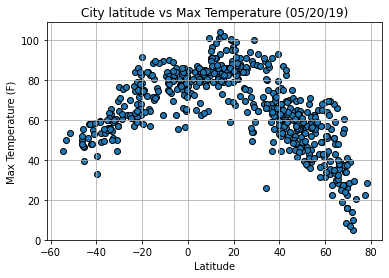

In [18]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"], edgecolors="black")
plt.title("City latitude vs Max Temperature (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()


#### Latitude vs. Humidity Plot

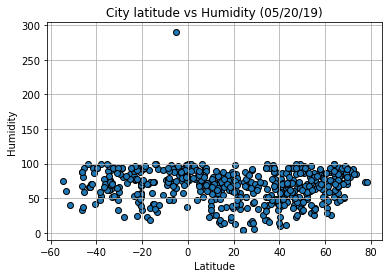

In [19]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"], edgecolors="black")
plt.title("City latitude vs Humidity (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

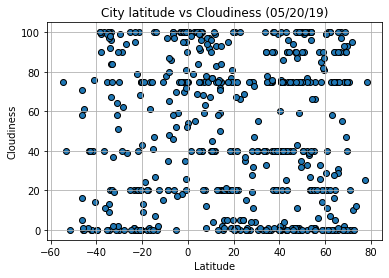

In [20]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"], edgecolors="black")
plt.title("City latitude vs Cloudiness (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

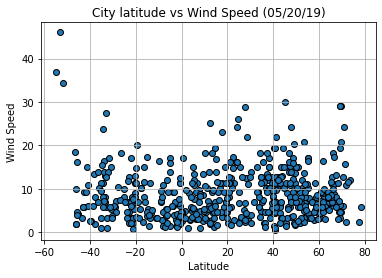

In [21]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"], edgecolors="black")
plt.title("City latitude vs Wind Speed (05/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

In [22]:
# Adding hemisphere column considering northern has latitude greater than or equal to 0
hemisphere = []
for x in cities_df["Lat"]:
    if x>=0:
        hemisphere.append("Northern Hemisphere")
    else:
        hemisphere.append("Southern Hemisphere")
        
cities_df["Hemisphere"] = hemisphere
cities_df.head()
        

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,0,ostrovnoy,2,RU,2019-05-20,72,68.05,39.51,37.50,7.16,Northern Hemisphere
1,1,mahebourg,75,MU,2019-05-20,74,-20.41,57.70,78.80,11.41,Southern Hemisphere
2,2,qaanaaq,25,GL,2019-05-20,73,77.48,-69.36,22.20,2.37,Northern Hemisphere
3,3,zhuhai,0,CN,2019-05-20,39,40.71,112.04,44.60,4.47,Northern Hemisphere
4,4,cape town,20,ZA,2019-05-20,76,-33.93,18.42,55.99,8.05,Southern Hemisphere


## Linear Regression

In [81]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(hemisphere,yvalue):
    x_values = hemisphere["Lat"]
    y_values = hemisphere[yvalue]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(10,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f"{yvalue}")
    plt.title (f"Latitude vs {yvalue} Linear Regression")
    plt.savefig(f"output_data/{hemisphere['Hemisphere'][0]} - Latitude vs {yvalue} linregress.png")
    return plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities_df.loc[cities_df["Hemisphere"] == "Northern Hemisphere"]
southern = cities_df.loc[cities_df["Hemisphere"] == "Southern Hemisphere"]

In [25]:
northern.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,0,ostrovnoy,2,RU,2019-05-20,72,68.05,39.51,37.50,7.16,Northern Hemisphere
2,2,qaanaaq,25,GL,2019-05-20,73,77.48,-69.36,22.20,2.37,Northern Hemisphere
3,3,zhuhai,0,CN,2019-05-20,39,40.71,112.04,44.60,4.47,Northern Hemisphere
8,8,tiksi,95,RU,2019-05-20,88,71.64,128.87,14.10,15.70,Northern Hemisphere
9,9,pushkinskiye gory,6,RU,2019-05-20,70,57.02,28.91,65.04,6.93,Northern Hemisphere


In [26]:
southern.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
1,1,mahebourg,75,MU,2019-05-20,74,-20.41,57.70,78.80,11.41,Southern Hemisphere
4,4,cape town,20,ZA,2019-05-20,76,-33.93,18.42,55.99,8.05,Southern Hemisphere
5,5,atuona,78,PF,2019-05-20,76,-9.80,-139.03,81.96,16.49,Southern Hemisphere
6,6,flinders,0,AU,2019-05-20,62,-34.58,150.85,60.01,11.41,Southern Hemisphere
7,7,opuwo,0,NaN,2019-05-20,23,-18.06,13.84,72.06,5.44,Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

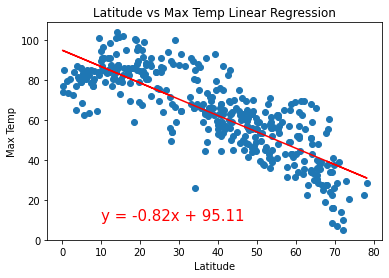

In [82]:
linear_reg(northern,"Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

KeyError: 0

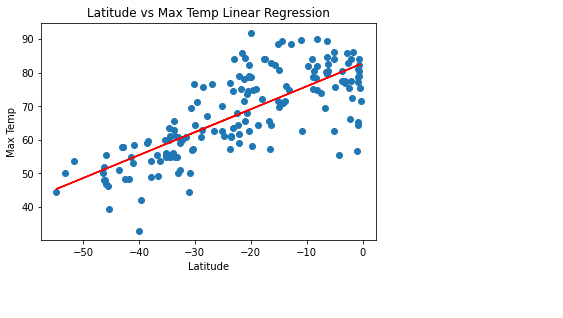

In [83]:
linear_reg(southern,"Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
linear_reg(northern,"Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

KeyError: 0

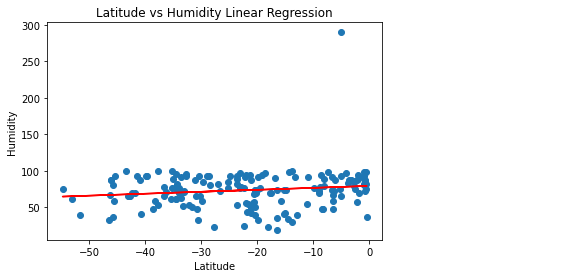

In [84]:
linear_reg(southern,"Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


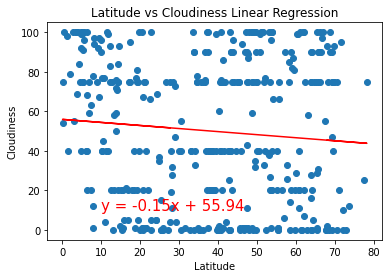

In [85]:
linear_reg(northern,"Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

KeyError: 0

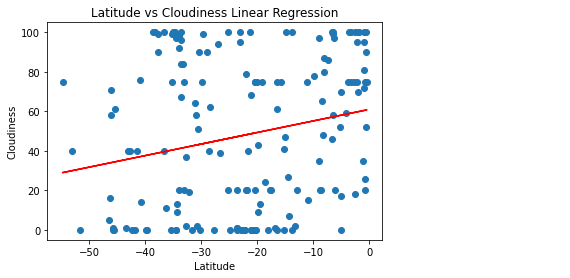

In [86]:
linear_reg(southern,"Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


In [ ]:
linear_reg(southern,"Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

KeyError: 0

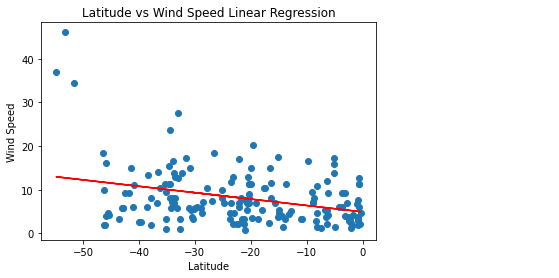

In [87]:
linear_reg(southern,"Wind Speed")